# Half space classifier and Logistic Regression

The Dataset used for this assignment is the Wine Quality Binary classification dataset from Kaggle (https://www.kaggle.com/nareshbhat/wine-quality-binary-classification). This Data set contains the information related to the various factors affecting the quality of red wine.<br>
Number of Instances: 1600<br>
Missing values: NA<br>
Number of Attributes: 12<br>
Attribute Information:<br>
Input variables: (all numeric valued)<br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 – alcohol<br>

Output variable : (detect whether the quality is good or bad)<br> 
12 - quality (0-bad, 1-good)<br>

#### Import the necessary libraries

In [585]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read the csv file

In [586]:
df=pd.read_csv("wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null object
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


#### Data preprocessing

In [588]:
#preprocessing
#The quality column in the dataset has to be mapped as- 0 for bad and 1 for good.
df = df.replace({'quality': {'good': 1, 'bad': 0}})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [589]:
#checking for missing values
df.isna().any().any()

False

In [590]:
df.shape

(1599, 12)

In [591]:
# Overall statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


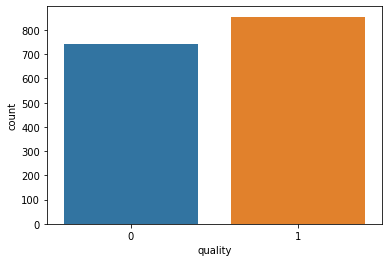

In [592]:
#We will use a countplot to visualize the count of observations for ‘quality’ column.
sns.countplot(x ='quality', data = df)

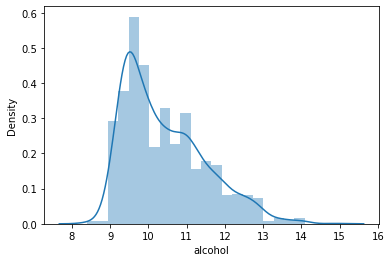

In [593]:
#Distribution of the column – alcohol
data = df['alcohol']
sns.distplot(data)
plt.show()

In [594]:
#features used for classification include – 
#alcohol, sulphates, total sulphur dioxide, volatile acidity, citric acid and residual sugar.
#target=quality
features=df.iloc[:,0:11]
target = df.iloc[:,11]

#### Feature importance

[0.07229425 0.09223196 0.07178958 0.06947729 0.0729051  0.06094062
 0.0942177  0.08111459 0.06909687 0.11150088 0.20443116]


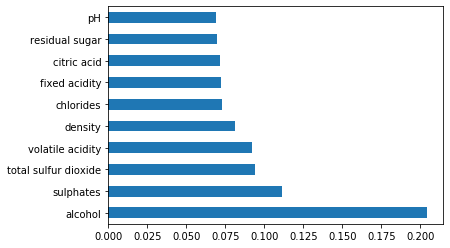

In [595]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features,target)
print(model.feature_importances_) 
imp = pd.Series(model.feature_importances_, index=features.columns)
imp.nlargest(10).plot(kind='barh')
plt.show()

In [596]:
#features=df.iloc[:,0:11]
features=df.iloc[:,[10,9,6,1,2,3]]
target = df.iloc[:,11]

#### Standardize the feature vectors

In [597]:
#standardize feature vectors
from sklearn.preprocessing import StandardScaler

In [598]:
#StandardScaler() will rescale the feature values so that their standard deviation is 1 and .mean is 0.
sc=StandardScaler()

In [599]:
scaled_features=sc.fit_transform(features)

## 1. Half space classifier using Perceptron algorithm

### Half space classifier using Perceptron algorithm with the split 70:30

In [602]:
#split the dataset
from sklearn.model_selection import train_test_split

In [603]:
#70% training data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42) 

In [604]:
a=0.1
epochs=1
w = [0.01] *7  #11 for features and one for Bias

def Sum(train,wt):  #evaluations
    pred=0
    for i in range(len(train)):
        pred+=train[i] * wt[i]
    pred+=wt[6]
    if pred>1:
        return 1
    else:
        return 0

for epochs in range(epochs):    #training the data
    for i in range(len(X_train)):
        pre=Sum(X_train[i],w)
        for j in range(6):
            w[j]=w[j]+a*(y_train.iloc[i]-pre)*X_train[i,j]
        w[6]=w[6]+a*(y_train.iloc[i]-pre)
    

result=[]
for i in X_test:
    result.append(Sum(i,w))

#### Evaluation

In [605]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [606]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       213
           1       0.79      0.63      0.70       267

    accuracy                           0.70       480
   macro avg       0.71      0.71      0.70       480
weighted avg       0.72      0.70      0.70       480



In [607]:
Perfomance=pd.DataFrame(columns=['Classifier','Accuracy'])
m=accuracy_score(y_test,result)
Perfomance=Perfomance.append({"Classifier":"Half Space Classifier(Perceptron) 70:30",'Accuracy':m},ignore_index=True)
Perfomance

,Classifier,Accuracy
0,Half Space Classifier(Perceptron) 70:30,0.702083


### Half space classifier using Perceptron algorithm with the split 80:20

In [608]:
#80% training data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42) 

In [609]:
a=0.1
epochs=1
w = [0.01] *7  #11 for features and one for Bias

def Sum(train,wt):  #evaluations
    pred=0
    for i in range(len(train)):
        pred+=train[i] * wt[i]
    pred+=wt[6]
    if pred>1:
        return 1
    else:
        return 0

for epochs in range(epochs):    #training the data
    for i in range(len(X_train)):
        pre=Sum(X_train[i],w)
        for j in range(6):
            w[j]=w[j]+a*(y_train.iloc[i]-pre)*X_train[i,j]
        w[6]=w[6]+a*(y_train.iloc[i]-pre)
    

result=[]
for i in X_test:
    result.append(Sum(i,w))

In [610]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69       141
           1       0.78      0.66      0.72       179

    accuracy                           0.71       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.72      0.71      0.71       320



In [611]:
m=accuracy_score(y_test,result)
Perfomance=Perfomance.append({"Classifier":"Half Space Classifier(Perceptron) 80:20",'Accuracy':m},ignore_index=True)
Perfomance

,Classifier,Accuracy
0,Half Space Classifier(Perceptron) 70:30,0.702083
1,Half Space Classifier(Perceptron) 80:20,0.706250


### Half space classifier using Perceptron algorithm with the split 90:10

In [612]:
#90% training data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.1, random_state=42) 

In [613]:
a=0.1
epochs=1
w = [0.01] *7  #11 for features and one for Bias

def Sum(train,wt):  #evaluations
    pred=0
    for i in range(len(train)):
        pred+=train[i] * wt[i]
    pred+=wt[6]
    if pred>1:
        return 1
    else:
        return 0

for epochs in range(epochs):    #training the data
    for i in range(len(X_train)):
        pre=Sum(X_train[i],w)
        for j in range(6):
            w[j]=w[j]+a*(y_train.iloc[i]-pre)*X_train[i,j]
        w[6]=w[6]+a*(y_train.iloc[i]-pre)
    

result=[]
for i in X_test:
    result.append(Sum(i,w))

In [614]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71        72
           1       0.76      0.78      0.77        88

    accuracy                           0.74       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.74      0.74      0.74       160



In [615]:
m=accuracy_score(y_test,result)
Perfomance=Perfomance.append({"Classifier":"Half Space Classifier(Perceptron) 90:10",'Accuracy':m},ignore_index=True)
Perfomance

,Classifier,Accuracy
0,Half Space Classifier(Perceptron) 70:30,0.702083
1,Half Space Classifier(Perceptron) 80:20,0.706250
2,Half Space Classifier(Perceptron) 90:10,0.743750


## 2. Logistic regressing using Gradient Descent

### Logistic regression using Standard Gradient Descent algorithm with split 70:30

In [616]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [617]:
#70% training data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42) 

In [618]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [619]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70       213
           1       0.76      0.73      0.75       267

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



In [620]:
m=accuracy_score(y_test,lr.predict(X_test))
Perfomance=Perfomance.append({"Classifier":"Logistic regression 70:30",'Accuracy':m},ignore_index=True)
Perfomance

,Classifier,Accuracy
0,Half Space Classifier(Perceptron) 70:30,0.702083
1,Half Space Classifier(Perceptron) 80:20,0.706250
2,Half Space Classifier(Perceptron) 90:10,0.743750
3,Logistic regression 70:30,0.722917


### Logistic regression using Standard Gradient Descent algorithm with split 80:20

In [621]:
#80% training data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42) 

In [622]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [623]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       141
           1       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [624]:
m=accuracy_score(y_test,lr.predict(X_test))
Perfomance=Perfomance.append({"Classifier":"Logistic regression 80:20",'Accuracy':m},ignore_index=True)
Perfomance

,Classifier,Accuracy
0,Half Space Classifier(Perceptron) 70:30,0.702083
1,Half Space Classifier(Perceptron) 80:20,0.706250
2,Half Space Classifier(Perceptron) 90:10,0.743750
3,Logistic regression 70:30,0.722917
4,Logistic regression 80:20,0.740625


### Logistic regression using Standard Gradient Descent algorithm with split 90:10

In [625]:
#90% training data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.1, random_state=42) 

In [626]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [627]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        72
           1       0.76      0.76      0.76        88

    accuracy                           0.74       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.74      0.74      0.74       160



In [628]:
m=accuracy_score(y_test,lr.predict(X_test))
Perfomance=Perfomance.append({"Classifier":"Logistic regression 90:10",'Accuracy':m},ignore_index=True)
Perfomance

,Classifier,Accuracy
0,Half Space Classifier(Perceptron) 70:30,0.702083
1,Half Space Classifier(Perceptron) 80:20,0.706250
2,Half Space Classifier(Perceptron) 90:10,0.743750
3,Logistic regression 70:30,0.722917
4,Logistic regression 80:20,0.740625
5,Logistic regression 90:10,0.737500


### Logistic regression using Stochastic Standard Gradient Descent algorithm with split 70:30

In [629]:
#70% training data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42) 

In [630]:
lrSGD=SGDClassifier(loss="log")

In [631]:
lrSGD.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [632]:
print(classification_report(y_test,lrSGD.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       213
           1       0.74      0.75      0.75       267

    accuracy                           0.72       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.72      0.72      0.72       480



In [633]:
m=accuracy_score(y_test,lrSGD.predict(X_test))
Perfomance=Perfomance.append({"Classifier":"Logistic regression SGD 70:30",'Accuracy':m},ignore_index=True)
Perfomance

,Classifier,Accuracy
0,Half Space Classifier(Perceptron) 70:30,0.702083
1,Half Space Classifier(Perceptron) 80:20,0.706250
2,Half Space Classifier(Perceptron) 90:10,0.743750
3,Logistic regression 70:30,0.722917
4,Logistic regression 80:20,0.740625
5,Logistic regression 90:10,0.737500
6,Logistic regression SGD 70:30,0.716667


### Logistic regression using Stochastic Standard Gradient Descent algorithm with split 80:20

In [634]:
#80% training data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42) 
lrSGD=SGDClassifier(loss="log")
lrSGD.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [635]:
print(classification_report(y_test,lrSGD.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71       141
           1       0.77      0.74      0.76       179

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.74      0.73      0.73       320



In [636]:
m=accuracy_score(y_test,lrSGD.predict(X_test))
Perfomance=Perfomance.append({"Classifier":"Logistic regression SGD 80:20",'Accuracy':m},ignore_index=True)
Perfomance

,Classifier,Accuracy
0,Half Space Classifier(Perceptron) 70:30,0.702083
1,Half Space Classifier(Perceptron) 80:20,0.706250
2,Half Space Classifier(Perceptron) 90:10,0.743750
3,Logistic regression 70:30,0.722917
4,Logistic regression 80:20,0.740625
5,Logistic regression 90:10,0.737500
6,Logistic regression SGD 70:30,0.716667
7,Logistic regression SGD 80:20,0.734375


### Logistic regression using Stochastic Standard Gradient Descent algorithm with split 90:10

In [637]:
#90% training data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.1, random_state=42) 
lrSGD=SGDClassifier(loss="log")
lrSGD.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [638]:
print(classification_report(y_test,lrSGD.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        72
           1       0.74      0.76      0.75        88

    accuracy                           0.73       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.72      0.72      0.72       160



### Evaluation summary

In [639]:
m=accuracy_score(y_test,lrSGD.predict(X_test))
Perfomance=Perfomance.append({"Classifier":"Logistic regression SGD 90:10",'Accuracy':m},ignore_index=True)
Perfomance

,Classifier,Accuracy
0,Half Space Classifier(Perceptron) 70:30,0.702083
1,Half Space Classifier(Perceptron) 80:20,0.706250
2,Half Space Classifier(Perceptron) 90:10,0.743750
3,Logistic regression 70:30,0.722917
4,Logistic regression 80:20,0.740625
5,Logistic regression 90:10,0.737500
6,Logistic regression SGD 70:30,0.716667
7,Logistic regression SGD 80:20,0.734375
8,Logistic regression SGD 90:10,0.725000


1    88
0    72
Name: quality, dtype: int64


Text(0, 0.5, 'Test')

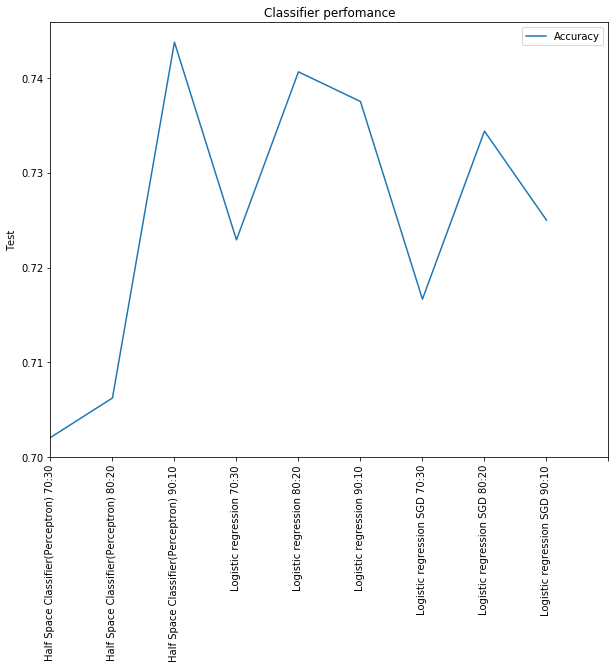

In [640]:
X=[0,1,2,3,4,5,6,7,8,9]
Y=Perfomance['Classifier']
print(y_test.value_counts())
Perfomance.plot(figsize=(10,8))
l=plt.xticks(X, Y, rotation ='vertical') 
plt.title("Classifier perfomance")
plt.ylabel("Test")

### Logistic regression using Gradient Descent from scratch

In [641]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from pandas import DataFrame 
import numpy as np
X, Y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=5, random_state=11)
m = 100

In [642]:
#returns an array containing sigmoid of the input array
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#returns an array containing the predictions of our input array
def hy(w,X):
    z = np.array(w[0] + w[1]*np.array(X[:,0]) + w[2]*np.array(X[:,1]))
    return sigmoid(z)

#cost function
def cost(w, X, Y):
    y_predictions = hy(w,X)   #assigning the prediction values
    return -1 * sum(Y*np.log(y_predictions) + (1-Y)*np.log(1-y_predictions))

In [643]:
#gradient descent
def partial_derivatives(w, X, Y):
    y_predictions = hy(w,X)
    j = [0]*3
    j[0] = -1 * sum(Y*(1-y_predictions) - (1-Y)*y_predictions)   #storing partial derivatives
    j[1] = -1 * sum(Y*(1-y_predictions)*X[:,0] - (1-Y)*y_predictions*X[:,0])
    j[2] = -1 * sum(Y*(1-y_predictions)*X[:,1] - (1-Y)*y_predictions*X[:,1])
    return j  #returns array containg partial derivatives

def gradient_descent(w_new, w_prev, learning_rate):
    print(w_prev)
    print(cost(w_prev, X, Y))
    j=0
    while True:
        w_prev = w_new    #updating weights in each iteration
        w0 = w_prev[0] - learning_rate*partial_derivatives(w_prev, X, Y)[0]
        w1 = w_prev[1] - learning_rate*partial_derivatives(w_prev, X, Y)[1]
        w2 = w_prev[2] - learning_rate*partial_derivatives(w_prev, X, Y)[2]
        w_new = [w0, w1, w2]
        print(w_new)
        print(cost(w_new, X, Y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 <pow(10,-6):
            return w_new
        
        if j>100: 
            return w_new
        j+=1
        


In [644]:
w=[1,1,1]
w = gradient_descent(w,w,0.0099)
print(w)

[1, 1, 1]
46.31288789708367
[1.1079507245584042, 0.2969837369128765, 1.2186409189454974]
18.415631239815163
[1.1567134530171574, 0.16183333416345108, 1.1120359908759199]
15.764970311820319
[1.1956340452627843, 0.11168372438532043, 1.0065681072990342]
14.390975297691252
[1.228800150098776, 0.10254160300986918, 0.9108147076874951]
13.413380981005371
[1.2583864140697623, 0.1084745674620498, 0.8272651865221922]
12.674975027338851
[1.2854398262131148, 0.11620153726123775, 0.7576199527770213]
12.161030223452148
[1.3101833923936477, 0.12237837834117099, 0.7036191340300149]
11.845771629675864
[1.332714419842769, 0.12705763656798197, 0.6656067571307069]
11.674958378542106
[1.3533213312381038, 0.13062937310604156, 0.6416698988168651]
11.587071734131417
[1.3724268439083172, 0.1333680072233094, 0.6282570895102525]
11.536957041318509
[1.3904325176763765, 0.13551783359970423, 0.6216372460538414]
11.501390505989455
[1.4076333833264856, 0.1372917989425709, 0.6189421205109624]
11.471295759293422
[1.424

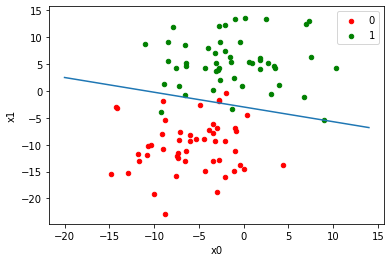

In [645]:
def equation(x):
    return (-w[0]-w[1]*x)/w[2]


def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y) 

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'green'}
fig, ax = plt.subplots()
g = df.groupby('label')
for key, group in g:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(equation, range(-20,15))
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()
